<div class="alert alert-info">
Ссылка для просмотра ноутбука в интерактивном режиме для использования гиперссылок и корректного отображения разметки:<br>
<a href='https://nbviewer.org/github/yulianikola/portfolio/blob/master/data_analysis_python/2_hypothesis/hypothesis_pokemon.ipynb'>hypothesis_pokemon</a></div>

### Тестирование гипотез
#### Данные о покемонах

Покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. В датасете каждая строка представляет характеристики одного покемона:
* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона
<br>Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
что они имеют одинаковую значимость.

<h4>Содержание</h4>
<p id="0">
<ul type="square"><a href="#1"><li>Знакомство с данными</li></a>
<li>Односторонний Т-тест</li>   
    <ul><a href="#2"><li>Задание 1</li></a>
    <a href="#3"><li>Задание 2</li></a>
    <a href="#4"><li>Задание 3</li></a>
    <a href="#5"><li>Задание 4</li></a></ul>
<li>ANOVA</li>    
    <ul><a href="#6"><li>Задание 5</li></a></ul>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

<p id="1">
<h4>Знакомство с данными</h4>

In [2]:
pokemon = pd.read_csv('c:\\python\\portfolio\\data_analysis_python\\2_hypothesis\\data\\pokemon.csv')
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


В датасете 800 покемонов. Одно пустое значение есть в столбце Name. В столбце Class 2 только 414 значений. В остальном пропусков нет. Типы данных определились корректно, значит в числовых показателях нет и нечисловых символов, которыми могут обозначать пропуски:

In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


Посмотрим, что это за запись с пустым именем покемона:

In [4]:
pokemon[pokemon.Name.isna()]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,False


Судя по значениям столбцов категориальных признаков, "нестандартных" пустот вроде "?" нет:

In [5]:
print(pokemon['Class 1'].unique())
print('')
print(pokemon['Class 2'].unique())
print('')
print(pokemon['Legendary'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']

[False  True]


Посмотрим статистики для числовых показателей:

In [6]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


Полных дубликатов строк нет:

In [7]:
pokemon.duplicated(keep = False).sort_values()

0      False
527    False
528    False
529    False
530    False
       ...  
270    False
271    False
272    False
262    False
799    False
Length: 800, dtype: bool

Дубликатов по имени нет:

In [8]:
pokemon.duplicated(['Name'], keep = False).sort_values()

0      False
527    False
528    False
529    False
530    False
       ...  
270    False
271    False
272    False
262    False
799    False
Length: 800, dtype: bool

Всего есть 18 классов, которые используются и в Class 1 и в Class 2:

In [9]:
print('значений Class 1: ', pokemon['Class 1'].nunique())
print('значений Class 2: ', pokemon['Class 2'].nunique())
print('пересечение значений: ', len(set(pokemon['Class 1'].values) & set(pokemon['Class 2'].values)))
print('непересекающихся значений: ', len(set(pokemon['Class 1'].values) - set(pokemon['Class 2'].values)))
print(pokemon['Class 1'].unique())

значений Class 1:  18
значений Class 2:  18
пересечение значений:  18
непересекающихся значений:  0
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


<a href="#0"><h4>Наверх</h4></a>

<p id="2">
<h4>Задание 1</h4><br>
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически. Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их. Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.


Сформулируем гипотезы:<br>
* Нулевая гипотеза: средняя атака покемонов Grass <= чем средняя атака покемонов Rock.
* Альтернативная: средняя атака покемонов Grass выше, чем средняя атака покемонов Rock.

Разделим показатели атаки по классам покемонов. Отберем покемонов, у которых Class 1 или Class 2 является Grass или Rock. При этом исключим тех, кто относится к обоим классам:

In [10]:
grass_att = pokemon[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) |
                   ((pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock'))]['Attack']

rock_att = pokemon[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')) |
                   ((pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass'))]['Attack']
print(grass_att.shape)
print(rock_att.shape)

(93,)
(56,)


Средняя атака Grass в наших данных ниже, чем средняя атака Rock, 74 vs. 92:

In [11]:
print('средняя атака grass: ', grass_att.mean(),'средняя атака rock: ', rock_att.mean())

средняя атака grass:  73.73118279569893 средняя атака rock:  91.78571428571429


По боксплотам выбросов в атаках Grass и в атаках Rock нет:

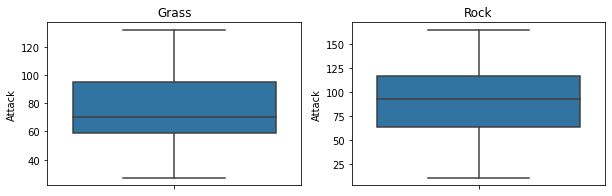

In [12]:
plt.figure(figsize = (10, 3)) 
plt.subplot(1, 2, 1)
sns.boxplot(y = grass_att);
plt.title('Grass');
plt.subplot(1, 2, 2)
sns.boxplot(y = rock_att)
plt.title('Rock');

Признак количественный. Распределения атак считаем нормальными. Две независимых выборки, сравниваем два средних. Используем Т-тест для независимых выборок, односторонний, так как нам важно направление. Уровень значимости здесь и далее возьмем общепринятый 5%.

Равны ли дисперсии атак у Grass и Rock? Разница между выборочными стандартными отклонениями 43%. Есть мнение, что при разнице больше 5 % считать дисперсии неравными. Есть отдельная группа тестов для проверки равенства дисперсий. Есть мнение, что поправка Уэлча для профилактики не должна навредить. Есть мнение, что использование поправки в случае, когда дисперсии равны, увеличивает вероятность ошибки 2го рода (не отвергнуть некорректную нулевую). В документации теста ttest_ind сказано, что в случае неравных дисперсий, отсутствие поправки занижает р значение. Опираясь на разницу между ср.кв.откл в 43 %, сделаем поправку Уэлча и попробуем учесть все остальные "но" при интерпретации.

In [13]:
print('ско атаки grass', grass_att.std())
print('ско атаки rock', rock_att.std())
print('относительная разница ско',(rock_att.std() - grass_att.std()) / grass_att.std())

ско атаки grass 24.17964459449772
ско атаки rock 34.80528396964737
относительная разница ско 0.4394456392286098


In [14]:
t,p = stats.ttest_ind(grass_att, rock_att, alternative = 'greater', equal_var = False)
print(t, p)

-3.4169379582521513 0.9995179726543227


* При условии, что Н0 верна (т.е. средняя атака Grass <= Rock), данные не противоречат Н0. 
* При условии, что Н0 верна, вероятность полученного (или более экстремального) значения тестовой статистики равна почти 100%.
* По нашим данным более чем достаточно аргументов в пользу H0.
* Не отвергаем Н0 в пользу Н1.
* Выборочные средние 74 (Grass) и 92 (Rock). По тесту средняя атака Grass не отличается статистически значимо в большую сторону от средней атаки Rock. С практической точки зрения тоже в большую сторону Grass от Rock по атаке не отличается, но значительно отличается в меньшую сторону.
* Средняя атака покемонов класса Grass не отличается от средней атаки покемонов Rock или ниже ее. Профессор оказался неправ.

По итогам теста мы не отвергаем нулевую, поэтому риск повышенной ошибки 2 рода для нас тут актуален. Но р-значение настолько большое, что в данном случае его завышенность значения не имеет. Можем для проверки провести тест без поправки, хотя в статистике так не принято и это считается р-хаккингом. Отсутствие поправки на тест практически не повлияло:

In [15]:
t,p = stats.ttest_ind(grass_att, rock_att, alternative = 'greater')
print(t, p)

-3.729457582692065 0.9998633330927005


<a href="#0"><h4>Наверх</h4></a>

<p id="3">
<h4>Задание 2</h4><br>
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. Проверьте, прав ли он, и убедите его в своем выводе статистически.    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их. Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

Сформулируем гипотезы:<br>
* Нулевая гипотеза: средняя скорость покемонов Water <= средняя корость покемонов Normal.
* Альтернативная: средняя скорость покемонов Water выше, чем средняя корость покемонов Normal.

Разделим показатели скорости по классам покемонов. Отберем покемонов, у которых Class 1 или Class 2 является Water или Normal. При этом исключим тех, кто относится к обоим классам:

In [16]:
water_sp = pokemon[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) |
                   ((pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal'))]['Speed']

norm_sp = pokemon[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')) |
                   ((pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water'))]['Speed']
print(water_sp.shape)
print(norm_sp.shape)

(125,)
(101,)


Средняя скорость Water в наших данных ниже, чем средняя скорость Normal, 65 vs. 72:

In [17]:
print('средняя скорость water: ', water_sp.mean(),'средняя скорость normal: ', norm_sp.mean())

средняя скорость water:  64.936 средняя скорость normal:  72.25742574257426


По боксплотам выбросов в скорости Water и Normal нет:

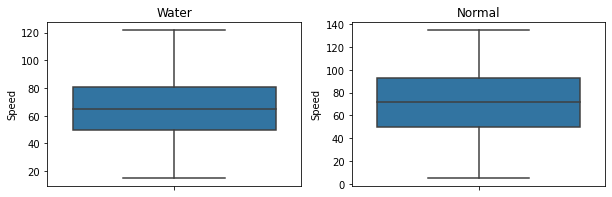

In [18]:
plt.figure(figsize = (10, 3)) 
plt.subplot(1, 2, 1)
sns.boxplot(y = water_sp);
plt.title('Water');
plt.subplot(1, 2, 2)
sns.boxplot(y = norm_sp);
plt.title('Normal');

Признак количественный. Распределения скорости считаем нормальными. Две независимых выборки, сравниваем два средних. Используем Т-тест для независимых выборок, односторонний, так как нам важно направление.

Равны ли дисперсии скорости Water и Normal? Опираясь на разницу между ср.кв.откл в 25 %, сделаем поправку Уэлча и попробуем учесть все остальные "но" при интерпретации.

In [19]:
print('ско скорости water', water_sp.std())
print('ско скорости normal', norm_sp.std())
print('относительная разница ско',(norm_sp.std() - water_sp.std()) / water_sp.std())

ско скорости water 22.748890082815027
ско скорости normal 28.427329619697492
относительная разница ско 0.24961391594098356


In [20]:
t,p = stats.ttest_ind(water_sp, norm_sp, alternative = 'greater', equal_var = False)
print(t, p)

-2.101186385266549 0.9815261383086286


* При условии, что Н0 верна (т.е. средняя скорость Water <= Normal), данные не противоречат Н0. 
* При условии, что Н0 верна, вероятность полученного (или более экстремального) значения тестовой статистики равна 98%.
* По нашим данным более чем достаточно аргументов в пользу H0.
* Не отвергаем Н0 в пользу Н1.
* Выборочные средние 65 (Water) и 72 (Normal). По тесту средняя скорость Water не отличается статистически значимо в большую сторону от средней скорости Normal. С практической точки зрения тоже в большую сторону Water от Normal по скорости не отличается, но значительно отличается в меньшую сторону.
* Средняя скорость Water не отличается от средней скорости Normal или ниже ее. Профессор оказался неправ.

По итогам теста мы не отвергаем нулевую, поэтому риск повышенной ошибки 2 рода для нас тут актуален. Но р-значение настолько большое, что в данном случае его завышенность значения не имеет. Можем для проверки провести тест без поправки, хотя в статистике так не принято и это считается р-хаккингом. Отсутствие поправки на тест практически не повлияло:

In [21]:
t,p = stats.ttest_ind(water_sp, norm_sp, alternative = 'greater')
print(t, p)

-2.150913330007121 0.9837232322430448


<a href="#0"><h4>Наверх</h4></a>

<p id="4">
<h4>Задание 3</h4><br>
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически. Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [22]:
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

Для корректной проверки работы сыворотки нужно сравнить скорость конкретно этих покемонов до и после ее использования.
Но такой информации нет, значит остается только сравнивать среднюю скорость покемонов, использовавших сыворотку,
и всех остальных покемонов.

Сформулируем гипотезы:<br>
* Нулевая гипотеза:  средняя скорость покемонов принявших сыворотку <= средняя корость остальных покемонов.
* Альтернативная: средняя скорость покемонов принявших сыворотку выше, чем средняя корость остальных покемонов.

Разделим покемонов:

In [23]:
treat_sp = pokemon[pokemon['Name'].isin(treathed_pokemon)]['Speed']
not_treat_sp = pokemon[~pokemon['Name'].isin(treathed_pokemon)]['Speed']

print(treat_sp.shape)
print(not_treat_sp.shape)

(4,)
(796,)


Средняя скорость покемонов после сыворотки в наших данных выше, чем средняя скорость остальных, 145 vs. 68:

In [24]:
print('средняя скорость "сывороточных" ', treat_sp.mean())
print('средняя скорость НЕ "сывороточных" ', not_treat_sp.mean())

средняя скорость "сывороточных"  145.0
средняя скорость НЕ "сывороточных"  67.89195979899498


По боксплотам выбросов в скорости "сывороточных" покемонов нет. А вот у остальных выделяются два покемона:

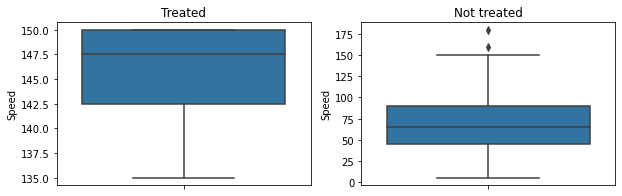

In [25]:
plt.figure(figsize = (10, 3)) 
plt.subplot(1, 2, 1)
sns.boxplot(y = treat_sp);
plt.title('Treated');
plt.subplot(1, 2, 2)
sns.boxplot(y = not_treat_sp);
plt.title('Not treated');

Покемоны потенциальные "выбросы" по скорости:

In [26]:
pokemon[(pokemon.Speed > 150) & (~ pokemon['Name'].isin(treathed_pokemon))]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
315,316,Ninjask,Bug,Flying,61,90,45,50,50,160,False
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True


Посмотрим, как влияет наличие выбросов на среднюю скорость и ее ско у не "сывороточных" покемонов. Влияние незначительное. Кроме того "выбросов" всего два, что вряд ли окажет влияние на тестовую статистику в части объема выборки не "сывороточных" (796 vs 794). Поэтому в связи с выбросами ничего не предпринимаем:

In [27]:
print('средняя скорость НЕ"сывороточных"', not_treat_sp.mean())
print('средняя скорость без выбросов', not_treat_sp[not_treat_sp < 160].mean())
print('')
print('ско скорости ', not_treat_sp.std())
print('ско скорости без выбросов', not_treat_sp[not_treat_sp < 160].std())

средняя скорость НЕ"сывороточных" 67.89195979899498
средняя скорость без выбросов 67.63476070528968

ско скорости  28.614785036677066
ско скорости без выбросов 28.182571788089852


Признак количественный. Распределения скорости считаем нормальными (поэтому совсем маленькая выборка "сывороточных" в 4 записи нас тут не беспокоит). Две независимых выборки, сравниваем два средних. Используем Т-тест для независимых выборок, односторонний, так как нам важно направление.

Равны ли дисперсии скорости "сывороточных" и остальных? Опираясь на значительную разницу между ср.кв.откл, сделаем поправку Уэлча и попробуем учесть все остальные "но" при интерпретации.

In [28]:
print('ско скорости "сывороточных"', treat_sp.std())
print('ско скорости остальных', not_treat_sp.std())
print('относительная разница ско',(not_treat_sp.std() - treat_sp.std()) / treat_sp.std())

ско скорости "сывороточных" 7.0710678118654755
ско скорости остальных 28.614785036677066
относительная разница ско 3.046741708325941


In [29]:
t,p = stats.ttest_ind(treat_sp, not_treat_sp, alternative = 'greater', equal_var = False)
print(t, p) 

20.96391663092999 4.053762771821796e-05


* При условии, что Н0 верна (т.е. средняя скорость "сывороточных" <= средняя скорость остальных), данные показывают очень маловероятные результаты.
* При условии, что Н0 верна, вероятность полученного (или более экстремального) значения тестовой статистики по сути равна 0.
* По нашим данным аргументов в пользу H0 практически нет.
* Отвергаем Н0 в пользу Н1.
* Выборочные средние 145 ("сывороточные") и 68 (остальные). По тесту средняя скорость "сывороточных" статистически значимо отличается от средней скорости остальных в большую сторону. С практической точки зрения эта разница тоже значима.
* Средняя скорость "сывороточных" покемонов выше, чем у остальных. На этот раз профессор оказался прав.

По итогам теста мы отвергаем нулевую, поэтому риск повышенной ошибки 2 рода для нас тут неактуален. Можем для проверки провести тест без поправки, хотя в статистике так не принято и это считается р-хаккингом. Отсутствие поправки значительно повлияло на значение тестовой статистики, но не на р-значение:

In [30]:
t,p = stats.ttest_ind(treat_sp, not_treat_sp, alternative = 'greater')
print(t, p) 

5.385407401082377 4.75755058815393e-08


Решение об исключении выбросов тоже относится к р-хаккингу, но попробуем провести тест на выборке без выбросов для проверки. Исключение выбросов на тест почти не повлияло:

In [31]:
t,p = stats.ttest_ind(treat_sp, not_treat_sp[not_treat_sp < 160], alternative = 'greater', equal_var = False)
print(t, p) 

21.055898358129713 4.11435422705434e-05


<a href="#0"><h4>Наверх</h4></a>

<p id="5">
<h4>Задание 4</h4><br>   
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? Убедите всех в своем выводе статистически. Вы можете предположить, что распределение сумм этих параметров является нормальным для всех классов покемонов.

Сформулируем гипотезы:<br>
* Нулевая гипотеза: средняя сумма характеристик легендарных покемонов <= средняя сумма остальных покемонов.
* Альтернативная: средняя сумма характеристик легендарных покемонов выше, чем средняя сумма остальных покемонов.

Добавим столбец с суммой указанных характеристик:

In [32]:
pokemon['char_sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']

Разделим покемонов на легендарных и остальных:

In [33]:
legend_sum = pokemon[(pokemon.Legendary == True)]['char_sum']
not_legend_sum = pokemon[(pokemon.Legendary != True)]['char_sum']

print(legend_sum.shape)
print(not_legend_sum.shape)

(65,)
(735,)


Средняя сумма характеристик легендарных покемонов в наших данных выше, чем средняя сумма у остальных, 309 vs. 214:

In [34]:
print('средняя сумма хар-к легендарных ', legend_sum.mean())
print('средняя сумма хар-к НЕ легендарных ', not_legend_sum.mean())

средняя сумма хар-к легендарных  309.0769230769231
средняя сумма хар-к НЕ легендарных  214.4108843537415


По сумме характеристик наблюдаются выбросы и у легендарных и у остальных:

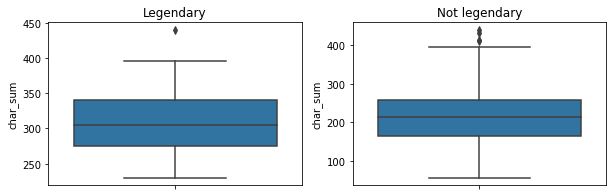

In [35]:
plt.figure(figsize = (10, 3)) 
plt.subplot(1, 2, 1)
sns.boxplot(y = legend_sum);
plt.title('Legendary');
plt.subplot(1, 2, 2)
sns.boxplot(y = not_legend_sum);
plt.title('Not legendary');

Для легендарных видно, что значение выброса больше 420. Для нелегендарных по графику непонятно. Посчитаем верхнюю границу, после которой боксплот считает значения выбросами:

In [36]:
up_out_leg_sum = not_legend_sum.describe()['75%'] + 1.5 * (not_legend_sum.describe()['75%'] - not_legend_sum.describe()['25%'] )
up_out_leg_sum

397.5

Посмотрим на этих покемонов:

In [37]:
pokemon[(pokemon.char_sum > up_out_leg_sum) & (pokemon.Legendary == False)]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,char_sum
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,False,430
268,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,False,414
313,314,Slaking,Normal,NaN,150,160,100,95,65,100,False,410
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,False,440


Посмотрим, как влияет наличие выбросов на среднюю сумму хар-к и ее ско у легендарных и нелегендарных покемонов.
Влияние незначительное. Кроме того у легендарных выброс один, у нелегендарных выбросов четыре, что вряд ли окажет влияние на тестовую статистику на фоне объема выборок (65 и 735). Поэтому в связи с выбросами ничего не предпринимаем:

In [38]:
print('средняя сумма легендарных', legend_sum.mean())
print('средняя сумма легендарных без выбросов', legend_sum[legend_sum < 420].mean())
print('относительная разница',
      (legend_sum.mean() - legend_sum[legend_sum < 420].mean()) / legend_sum[legend_sum < 420].mean())
print('')
print('ско суммы легендарных', legend_sum.std())
print('ско суммы легендарных без выбросов', legend_sum[legend_sum < 420].std())
print('относительная разница',
      (legend_sum.std() - legend_sum[legend_sum < 420].std()) / legend_sum[legend_sum < 420].std())
print('---')
print('средняя сумма НЕ легендарных', not_legend_sum.mean())
print('средняя сумма НЕ легендарных без выбросов', not_legend_sum[not_legend_sum < up_out_leg_sum].mean())
print('относительная разница',
      (not_legend_sum.mean() - not_legend_sum[not_legend_sum < up_out_leg_sum].mean()) / not_legend_sum[not_legend_sum < up_out_leg_sum].mean())
print('')
print('ско суммы НЕ легендарных', not_legend_sum.std())
print('ско суммы НЕ легендарных без выбросов', not_legend_sum[not_legend_sum < up_out_leg_sum].std())
print('относительная разница',
      (not_legend_sum.std() - not_legend_sum[not_legend_sum < up_out_leg_sum].std()) / not_legend_sum[not_legend_sum < up_out_leg_sum].std())

средняя сумма легендарных 309.0769230769231
средняя сумма легендарных без выбросов 307.03125
относительная разница 0.006662752006263513

ско суммы легендарных 46.42982194004856
ско суммы легендарных без выбросов 43.74492034002983
относительная разница 0.061376305617862795
---
средняя сумма НЕ легендарных 214.4108843537415
средняя сумма НЕ легендарных без выбросов 213.26675786593708
относительная разница 0.005364767107884812

ско суммы НЕ легендарных 64.3595985033824
ско суммы НЕ легендарных без выбросов 62.63535460801218
относительная разница 0.027528285042225344


Признак количественный. Распределения суммы характеристик считаем нормальными. Две независимых выборки, сравниваем два средних. Используем Т-тест для независимых выборок, односторонний, так как нам важно направление. 

Равны ли дисперсии суммы характеристик для легендарных и нелегндарных? Опираясь на разницу между ср.кв.откл в 38 %, сделаем поправку Уэлча и попробуем учесть все остальные "но" при интерпретации:

In [39]:
print('ско суммы легендарных', legend_sum.std())
print('ско суммы НЕ легендарных', not_legend_sum.std())
print('относительная разница ско', (not_legend_sum.std() - legend_sum.std()) / legend_sum.std())

ско суммы легендарных 46.42982194004856
ско суммы НЕ легендарных 64.3595985033824
относительная разница ско 0.38616940177985715


In [40]:
t,p = stats.ttest_ind(legend_sum, not_legend_sum, alternative = 'greater', equal_var = False)
print(t, p) 

15.19759110757148 1.4641359351664928e-26


* При условии, что Н0 верна (т.е. средняя сумма легендарных <= у остальных), данные показывают очень маловероятные результаты.
* При условии, что Н0 верна, вероятность полученного (или более экстремального) значения тестовой статистики по сути равна 0.
* По нашим данным аргументов в пользу H0 практически нет.
* Отвергаем Н0 в пользу Н1.
* Выборочные средние 309 (легендарные) и 214 (остальные). По тесту средняя сумма показателей легендарных статистически значимо отличается от средней суммы остальных в большую сторону. С практической точки зрения эта разница тоже значима.
* Средняя сумма характеристик легендарных покемонов не отличается от средней суммы у остальных или ниже ее.

По итогам тестов мы отвергаем нулевую, поэтому риск повышенной ошибки 2 рода для нас тут неактуален. Можем для проверки провести тест без поправки, хотя в статистике так не принято и это считается р-хаккингом. Отсутствие поправки несколько повлияло на значение тестовой статистики, но не на р-значение:

In [41]:
t,p = stats.ttest_ind(legend_sum, not_legend_sum, alternative = 'greater')
print(t, p) 

11.591852366462316 3.9854711028610435e-29


Решение об исключении выбросов тоже относится к р-хаккингу, но попробуем провести тест на выборках без выбросов для проверки. Исключение выбросов на p-значения не повлияло:

In [42]:
t,p = stats.ttest_ind(legend_sum[legend_sum < 420], not_legend_sum[not_legend_sum < up_out_leg_sum],
                      alternative = 'greater', equal_var = False)
print(t, p) 

15.788946832441807 1.2478449036770521e-27


<a href="#0"><h4>Наверх</h4></a>

<p id="6">
<h4>Задание 5</h4><br>
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил четыре класса `best_defense_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Вы можете предположить, что распределение защиты является нормальным для всех классов покемонов.

In [43]:
best_defense_class = ['Rock', 'Ground','Steel','Ice']

Сформулируем гипотезы:
* Нулевая гипотеза: средняя сила защиты равна у классов 'Rock', 'Ground', 'Steel', 'Ice'.
* Альтернативная: средняя сила защиты равна не у всех из классов 'Rock', 'Ground', 'Steel', 'Ice'.

Разделим покемонов по классам:

In [44]:
rock_def = pokemon[((pokemon['Class 1'] == 'Rock') & (~pokemon['Class 2'].isin(best_defense_class))) |
                   ((pokemon['Class 2'] == 'Rock') & (~pokemon['Class 1'].isin(best_defense_class)))]['Defense']

gr_def = pokemon[((pokemon['Class 1'] == 'Ground') & (~pokemon['Class 2'].isin(best_defense_class))) |
                   ((pokemon['Class 2'] == 'Ground') & (~pokemon['Class 1'].isin(best_defense_class)))]['Defense']

st_def = pokemon[((pokemon['Class 1'] == 'Steel') & (~pokemon['Class 2'].isin(best_defense_class))) |
                   ((pokemon['Class 2'] == 'Steel') & (~pokemon['Class 1'].isin(best_defense_class)))]['Defense']

ice_def = pokemon[((pokemon['Class 1'] == 'Ice') & (~pokemon['Class 2'].isin(best_defense_class))) |
                   ((pokemon['Class 2'] == 'Ice') & (~pokemon['Class 1'].isin(best_defense_class)))]['Defense']
print(rock_def.shape)
print(gr_def.shape)
print(st_def.shape)
print(ice_def.shape)

(41,)
(52,)
(40,)
(33,)


Средняя защита у четырех классов в наших данных отличается между собой: Rock и Steel ближе друг к другу 104 и 109, Ground и Ice ближе друг к другу 81 и 78.

In [45]:
print('средняя защита Rock ', rock_def.mean())
print('средняя защита Ground ', gr_def.mean())
print('средняя защита Steel ', st_def.mean())
print('средняя защита Ice', ice_def.mean())

средняя защита Rock  104.09756097560975
средняя защита Ground  81.07692307692308
средняя защита Steel  109.325
средняя защита Ice 78.51515151515152


Кроме Ground  у всех классов есть выбросы:

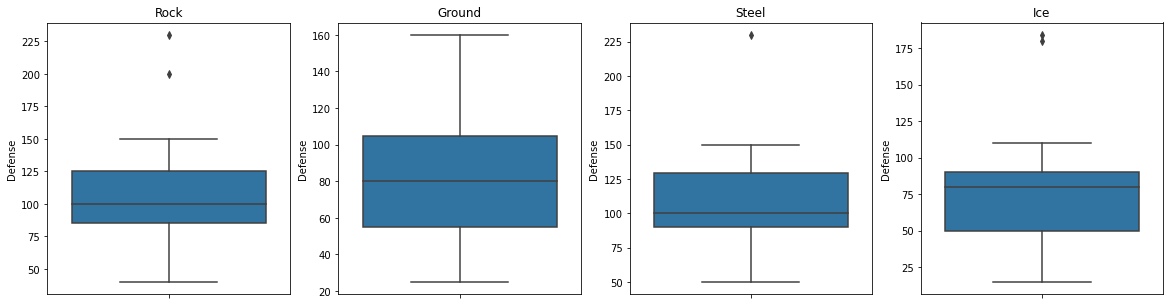

In [46]:
plt.figure(figsize = (20, 5)) 
plt.subplot(1,4,1)
sns.boxplot(y = rock_def);
plt.title('Rock');
plt.subplot(1,4,2)
sns.boxplot(y = gr_def);
plt.title('Ground');
plt.subplot(1,4,3)
sns.boxplot(y = st_def);
plt.title('Steel');
plt.subplot(1,4,4)
sns.boxplot(y = ice_def);
plt.title('Ice');

Посмотрим, как влияет наличие выбросов на среднюю защиту у выбранных классов по отдельности и суммарно. Разница 3-10% для классовых средних и 3% для общего среднего. Выбросов 1-2 штуки на класс, что вряд ли окажет влияние на тестовую статистику на фоне объема выборок (30-50 записей). Поэтому в связи с выбросами пока ничего не предпринимаем:

In [47]:
print('средняя защита Rock', rock_def.mean())
print('средняя защита Rock без выбросов', rock_def[rock_def < 180].mean())
print('относительная разница',
      (rock_def.mean() - rock_def[rock_def < 180].mean()) / rock_def[rock_def < 180].mean())
print('')
print('средняя защита Steel', st_def.mean())
print('средняя защита Steel без выбросов', st_def[st_def < 200].mean())
print('относительная разница', 
     (st_def.mean() - st_def[st_def < 200].mean()) / st_def[st_def < 200].mean())
print('')
print('средняя защита Ice', ice_def.mean())
print('средняя защита Ice без выбросов', ice_def[ice_def < 150].mean())
print('относительная разница', 
      (ice_def.mean() - ice_def[ice_def < 150].mean()) / ice_def[ice_def < 150].mean())
print('')
sum_mean = pd.concat([rock_def, gr_def, st_def, ice_def]).mean()
sum_mean_excl = pd.concat([rock_def[rock_def < 180], gr_def, st_def[st_def < 200], ice_def[ice_def < 150]]).mean()
print('суммарное среднее',sum_mean)
print('суммарное среднее без выбросов',sum_mean_excl)
print('относительная разница',(sum_mean - sum_mean_excl)/sum_mean_excl)

средняя защита Rock 104.09756097560975
средняя защита Rock без выбросов 98.41025641025641
относительная разница 0.057791786880870354

средняя защита Steel 109.325
средняя защита Steel без выбросов 106.23076923076923
относительная разница 0.029127443881245545

средняя защита Ice 78.51515151515152
средняя защита Ice без выбросов 71.83870967741936
относительная разница 0.09293655005374801

суммарное среднее 93.06024096385542
суммарное среднее без выбросов 89.59006211180125
относительная разница 0.03873397082506393


* Четыре выборки, независимые. Распределения считаем нормальными (поэтому небольшой размер выборок нас тут не беспокоит).
* Однофакторный дисперсионный анализ для более двух выборок (ANOVA).
* Но этот тест опирается на предположение о равенстве (генеральных) ско групп. Гетероскедастичность была бы меньшей проблемой, если бы размеры групп были сбалансированы, но это не наш случай (в меньшей группе 33 записи, в большей 52).
* Если не исключать выбросы, то: разница между наибольшим и наименьшим групповым ско 30%; наибольшее ско у Rock (средняя по величине группа n = 41), наименьшее ско у Ground (наибольшая по величине группа n = 52), у наименьшей группы третье по величине ско (Ice, n = 33, ско 35.8). Этот вариант ближе к ситуации, когда у групп с меньшим объемом больше ско, что для теста может вылиться в увеличение вероятности отвергнуть корректную нулевую.
* Если исключить выбросы, то: выборочные ско групп становятся ближе друг к друг; разница между наибольшим и наименьшим групповым ско 20%; наибольшее ско у Rock и Ground (средняя и наибольшая группа), наименьшее ско у Ice (наименьшая группа). Этот вариант ближе к ситуации, когда у групп с большим объемом больше ско, что для теста может вылиться в заниженную вероятность отвергнуть корректную нулевую и завышенную не отвергнуть некорректную нулевую.
* Проведем тест на выборках, исключая выбросы. Так как в этом варианте заметно меньше разница между групповыми ско. И сделать вывод, что разницы между классами нет, хотя на самом деле есть, кажется менее "дорогой" ошибкой, чем сделать вывод, что разница есть, хотя ее нет.

In [48]:
print('ско защита Rock', rock_def.std())
print(rock_def.shape)
print('ско защита Ground', gr_def.std())
print(gr_def.shape)
print('ско защита Steel', st_def.std())
print(st_def.shape)
print('ско защита Ice', ice_def.std())
print(ice_def.shape)
print('разница между min и max ско', (rock_def.std() - gr_def.std()) / gr_def.std())
print('')
print('ско защита Rock без выбросов', rock_def[rock_def < 180].std())
print(rock_def[rock_def < 180].shape)
print('ско защита Ground', gr_def.std())
print(gr_def.shape)
print('ско защита Steel без выбросов', st_def[st_def < 200].std())
print(st_def[st_def < 200].shape)
print('ско защита Ice без выбросов', ice_def[ice_def < 150].std())
print(ice_def[ice_def < 150].shape)
print('разница между min и max ско', (gr_def.std() - ice_def[ice_def < 150].std()) / ice_def[ice_def < 150].std())

ско защита Rock 38.22682623371236
(41,)
ско защита Ground 29.37709268563916
(52,)
ско защита Steel 32.157774112917636
(40,)
ско защита Ice 35.804260581075766
(33,)
разница между min и max ско 0.30124606416207234

ско защита Rock без выбросов 29.083109539023496
(39,)
ско защита Ground 29.37709268563916
(52,)
ско защита Steel без выбросов 25.851256243995426
(39,)
ско защита Ice без выбросов 24.640206674178625
(31,)
разница между min и max ско 0.19224213798598086


In [49]:
f, p = stats.f_oneway(rock_def[rock_def < 180], gr_def, st_def[st_def < 200], ice_def[ice_def < 150])
print(f,p)

11.960163322833713 4.2778786624304084e-07


* При условии, что Н0 верна (т.е. средняя защита у четырех классов одинакова), данные показывают очень маловероятные результаты.
* При условии, что Н0 верна, вероятность полученного (или более экстремального) значения тестовой статистики по сути равна 0.
* По нашим данным аргументов в пользу H0 практически нет.
* Отвергаем Н0 в пользу Н1.
* Средняя защита равна не у всех из четырех классов.
* Выборочные средние без выбросов 98, 106, 72, 90. По тесту средняя защита минимум одного из классов статистически значимо отличается от остальных. С практической точки зрения разница между классами тоже значима.
* Здесь у нас очень уверенное отвержение нулевой, поэтому риск заниженной вероятности отвергнуть корректную нулевую и завышенной вероятности не отвергнуть некорректную нулевую неактуален. 

Решение об исключении выбросов относится к р-хаккингу, но попробуем провести тест на выборках без исключения выбросов для проверки. Неисключение выбросов несколько изменило тестовую характеристику, но на р-значение по сути не повлияло:

In [50]:
f, p = stats.f_oneway(rock_def, gr_def, st_def, ice_def)
print(f,p)

8.820416931465497 1.885892116821956e-05


Еще существует Welch's ANOVA тест, который делает поправку на неравные ско групп, но он не реализован в scipy. Есть реализация в statsmodels. Статистика немного меняется, но р-значение по-прежнему почти 0:

In [51]:
import statsmodels.stats.oneway as anova

In [52]:
f, p = anova.anova_oneway([rock_def, gr_def, st_def, ice_def], use_var = 'unequal', welch_correction = False)
print(f, p)

9.195422545212688 2.5207963085148734e-05


<a href="#0"><h4>Наверх</h4></a>